# MULTIPLE LINEAR REGRESSION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# Importing Training data and Test Data and Feature Scaling

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
test_df.dropna()
train_df.dropna()
# Feature Scaling using Z-Score Normalization
mean = train_df.mean()
std = train_df.std()
train_df = (train_df - mean)/std

train_df

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice
0,0.656409,0.569608,-1.044836,-1.111755,-0.069209,-0.084179,0.791341,0.928126,-1.515070,-1.676737,0.034756
1,0.656409,0.237557,-1.044836,-1.111755,-0.312009,-0.638238,0.791341,0.297130,-0.988295,-1.676737,-0.215609
2,-0.810932,-0.392195,0.303637,0.036325,-0.294024,-0.617622,-1.049867,-0.333866,-1.383377,0.786878,-0.641230
3,2.857421,1.680261,1.652111,0.920911,4.579950,3.186057,0.791341,2.190119,1.217576,1.125021,4.679025
4,0.656409,-0.512420,0.303637,-0.349505,0.405149,0.225063,0.791341,-0.333866,0.789571,0.545347,-0.065390
...,...,...,...,...,...,...,...,...,...,...,...
1163,-0.077262,-0.231894,0.303637,-0.170706,-0.865052,-1.272184,-1.049867,-0.333866,0.229872,-0.324164,-0.397124
1164,0.656409,-0.094494,0.303637,-0.349505,-1.512517,-0.937172,0.791341,0.297130,0.657877,0.352122,-0.265682
1165,-0.810932,-1.397889,-1.044836,-1.064703,-0.602019,-0.970673,-1.049867,-0.964862,-0.757831,-1.676737,-0.829003
1166,-0.077262,0.266182,-1.044836,-0.467137,-0.145646,1.276487,-1.049867,0.928126,-0.527367,0.545347,-0.196832


# Implementing Gradient Descent

In [3]:
def gradient_descent(w_updated, b_updated , learning_rate, df):
    der_w = np.zeros(len(w_updated)) # Array storing dervative of cost function with respect to w(i) 
    der_b = 0 # Variable storing deravative of cost function with respect to b
    mean_squared_error = 0
    cost_function = 0 # Variable storing the value of Cost Function 

    # gradient descent
    for i in range(len(df)):
        x = df.iloc[i][:-1].values
        y = df.iloc[i].SalePrice
        prediction = np.dot(x,w_updated) + b_updated
        
        mean_squared_error += ((prediction - y)**2) # Calculating Mean Squared Error
        der_w += ((prediction - y) * x)/float(len(df))
        der_b += (prediction - y)/float(len(df)) 

    cost_function = mean_squared_error*std.SalePrice + mean.SalePrice # Calculating Cost Function
    w = w_updated - learning_rate*der_w # Updating value of w(i)
    b = b_updated - learning_rate*der_b # Updating value of b
    cost_function = cost_function/float(2*len(df))

    return w , b , cost_function

# Using Gradient Descent for Given Training Data

In [4]:
w = np.zeros(len(train_df.columns) - 1) # Intialising array storing w(i) with initial value as 0
b = 0 # Initialising Variable storing b with intial value as 0
learning_rate = 0.001 # Learning Rate
cost_function = 0 # Cost Function
epochs = 1000
cost_func = [0 for i in range(epochs+1)] #Initialising list to storevalue of cost function for different epochs to be used for plotting graph

# Calling Gradient Descent Function for the Training Set

for i in range (epochs+1):
    w,b,cost_function = gradient_descent(w,b,learning_rate,train_df)
    
    if i%50 == 0:
        print (f"Epoch:{i}")
        print (f" Cost Function:{cost_function}")
        

    cost_func[i] = cost_function #Storing value of cost function for Given Epoch



Epoch:0
 Cost Function:39985.08082907945
Epoch:50
 Cost Function:28149.02646018628
Epoch:100
 Cost Function:21132.504457117593
Epoch:150
 Cost Function:16964.51294632326
Epoch:200
 Cost Function:14480.51107239398
Epoch:250
 Cost Function:12992.4212980152
Epoch:300
 Cost Function:12093.666138712337
Epoch:350
 Cost Function:11543.983305736621
Epoch:400
 Cost Function:11201.37399248177
Epoch:450
 Cost Function:10981.897476959519
Epoch:500
 Cost Function:10835.917377241996
Epoch:550
 Cost Function:10734.067587625856
Epoch:600
 Cost Function:10658.9606413721
Epoch:650
 Cost Function:10600.28873375921
Epoch:700
 Cost Function:10551.929159486775
Epoch:750
 Cost Function:10510.233985104336
Epoch:800
 Cost Function:10473.019391322892
Epoch:850
 Cost Function:10438.96840130562
Epoch:900
 Cost Function:10407.277855927943
Epoch:950
 Cost Function:10377.44970650283
Epoch:1000
 Cost Function:10349.167584707628


In [8]:
for i in range(len(train_df.columns) - 1):
    print (f"The value of w({i+1}) is : {w[i]}")
    print("\n")

print (f"The value of b is : {b}")


The value of w(1) is : 0.20321164832167962


The value of w(2) is : 0.16641572907056187


The value of w(3) is : 0.1046903634766912


The value of w(4) is : 0.10307661609337047


The value of w(5) is : 0.11799595182641948


The value of w(6) is : 0.10718283454067058


The value of w(7) is : 0.0681596222918498


The value of w(8) is : 0.09639827023033208


The value of w(9) is : 0.08935036344881843


The value of w(10) is : 0.09270609812978903


The value of b is : -2.448502131705303e-16


# Plot of the Cost function after Multiple Epochs 



The Cost function is: 10349.167584707628





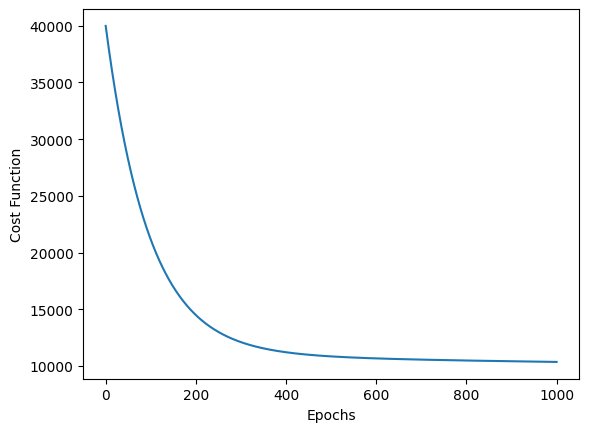

In [9]:
print ("\n")
print (f"The Cost function is: {cost_function}\n")
print ("\n")
plt.plot(range(epochs+1), cost_func)
plt.xlabel("Epochs")
plt.ylabel("Cost Function")
plt.show() # Printing the plot of Cost Function vs Epochs


# Predicting the Prices of the Houses in the Test file and Calculating Accuracy

In [7]:
test_df = pd.read_csv('test.csv')
root_mean_squared_error = [ 0 for i in range(len(test_df))]
rmse= 0
unscaled_prediction = [ 0 for i in range(len(test_df))]
test_df = (test_df - mean) / std #  Normalizing using Z-Score Normalization
test_df['SalePrice'] = test_df['SalePrice']*std['SalePrice'] + mean['SalePrice'] # Unscaling the Actual Sale Prices
for i in range(len(test_df)):
        x = test_df.iloc[i][:-1].values
        y = test_df.iloc[i].SalePrice
        prediction = np.dot(x,w) + b # Predicting the normalized prices by using values of w and b calculated from training model
        unscaled_prediction[i] =  prediction*std.SalePrice + mean.SalePrice #Unscaling the prediction
        mean_squared_error= ((unscaled_prediction[i]- y)**2) # Calculating Mean Squared Error
        root_mean_squared_error[i] = math.sqrt(mean_squared_error)
        rmse = rmse + root_mean_squared_error[i]

test_df['Predicted Prices'] =unscaled_prediction # Appending Prediction Prices column to the Test Dataframe
test_df['Error'] = root_mean_squared_error # Appending Error Column to the Test DataFrame

rmse = rmse/len(test_df) # Calculating the Root Mean Sqaured Error

print ("\n")
print (f"The Root Mean Squared Error is: {rmse}\n")
print ("\n")
test_df



The Root Mean Squared Error is: 24709.57569813712





,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice,Predicted Prices,Error
0,1.390080,0.855859,1.652111,1.302035,0.063431,-0.117680,0.791341,0.928126,1.151729,1.028409,281000.0,266587.301685,14412.698315
1,-0.077262,0.210840,-1.044836,-0.650641,0.411893,1.201753,0.791341,-0.333866,-0.428597,0.158898,139000.0,182704.190489,43704.190489
2,0.656409,-0.569670,0.303637,0.017504,-1.026918,-1.663891,0.791341,-1.595859,1.118805,0.980102,147400.0,170327.007705,22927.007705
3,-0.810932,0.071532,0.303637,1.579645,1.129051,1.013631,-1.049867,-0.964862,-0.757831,-0.565695,153500.0,181133.108585,27633.108585
4,-1.544603,-1.701315,-1.044836,-0.895314,-0.959474,-1.380419,-1.049867,-2.226855,-0.033515,0.835184,86000.0,79640.695473,6359.304527
...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,-0.077262,-0.693712,0.303637,0.469207,0.227546,-0.019753,-1.049867,-0.964862,1.085882,0.931796,158000.0,180630.610035,22630.610035
288,-0.077262,-1.020038,-1.044836,-0.998829,-1.289951,-1.759241,-1.049867,-0.964862,0.032332,1.076715,118000.0,117283.074067,716.925933
289,-0.077262,-1.285297,0.303637,-0.264811,-0.469379,-0.818629,-1.049867,-1.595859,1.052958,0.883490,140000.0,147861.155227,7861.155227
290,0.656409,-0.487612,0.303637,-0.415379,0.470345,0.258565,0.791341,-0.333866,1.184652,1.076715,159895.0,209330.466622,49435.466622
